In [59]:
import os
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import MinMaxScaler
from ydata_profiling import ProfileReport
import scipy
import numpy as np
import sklearn as sk
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import sweetviz as sv

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
#REPLACED WITH LDA AFTER TRANSFORMING NON NORMAL Xs from metric_learn import LFDA

In [89]:
"""
NOT WORKING, RETURNS EMPTY DATAFRAME
from nba_api.stats.endpoints import leaguedashplayerstats
leaguedashplayerstats.LeagueDashPlayerStats(
    season=2019-20,
    per_mode_detailed="PerGame",
    measure_type_detailed_defense='Base'
).get_data_frames()
"""

[Empty DataFrame
 Columns: [PLAYER_ID, PLAYER_NAME, NICKNAME, TEAM_ID, TEAM_ABBREVIATION, AGE, GP, W, L, W_PCT, MIN, FGM, FGA, FG_PCT, FG3M, FG3A, FG3_PCT, FTM, FTA, FT_PCT, OREB, DREB, REB, AST, TOV, STL, BLK, BLKA, PF, PFD, PTS, PLUS_MINUS, NBA_FANTASY_PTS, DD2, TD3, WNBA_FANTASY_PTS, GP_RANK, W_RANK, L_RANK, W_PCT_RANK, MIN_RANK, FGM_RANK, FGA_RANK, FG_PCT_RANK, FG3M_RANK, FG3A_RANK, FG3_PCT_RANK, FTM_RANK, FTA_RANK, FT_PCT_RANK, OREB_RANK, DREB_RANK, REB_RANK, AST_RANK, TOV_RANK, STL_RANK, BLK_RANK, BLKA_RANK, PF_RANK, PFD_RANK, PTS_RANK, PLUS_MINUS_RANK, NBA_FANTASY_PTS_RANK, DD2_RANK, TD3_RANK, WNBA_FANTASY_PTS_RANK]
 Index: []
 
 [0 rows x 66 columns]]

In [5]:
import pandas as pd
        
MSDS_422_FinalProject_Individual_Stats = pd.read_csv('../data/MSDS_422_FinalProject_Individual_Stats.csv')

df_full=MSDS_422_FinalProject_Individual_Stats


In [350]:
import os
os.getcwd()
C:\\Users\\Eyad\\DataspellProjects\\Player Classification\\code'

'C:\\Users\\Eyad\\DataspellProjects\\Player Classification\\code'

In [26]:
len(df_full['PLAYER_NAME'].unique().tolist())

2359

In [21]:
df_full["PLAYER_NAME"].value_counts().describe()

count    2359.000000
mean        4.932175
std         4.106675
min         1.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        21.000000
Name: count, dtype: float64

C:\Users\Eyad\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='count', ylabel='Count'>

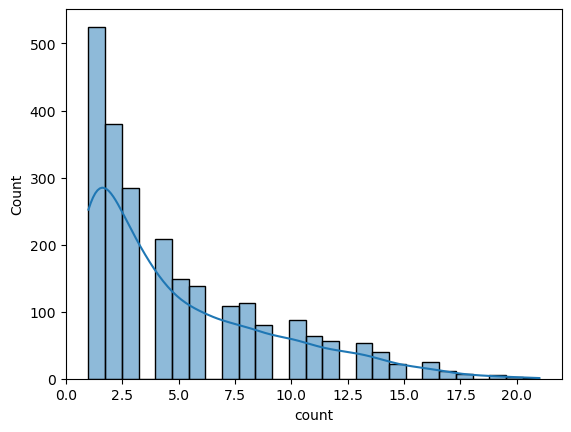

In [20]:
sns.histplot(df_full["PLAYER_NAME"].value_counts(), kde=True)

In [27]:
col_names = list(df_full.columns)
feature_col_names = list(df_full.columns)[9:]

In [28]:
#save the profile variables separately 
df_profiles = df_full.iloc[:,0:10]
#all the columns from 9 to the end
df_features = df_full.iloc[:,10:]

In [29]:
#impute nan values
imputer = sk.impute.SimpleImputer(strategy='mean')
df_features = imputer.fit_transform(df_features)    

In [30]:
feature_col_names_updated = feature_col_names[:df_features.shape[1]]

# Now convert the imputed array back to a DataFrame with the correct column names
df_features = pd.DataFrame(df_features, columns=feature_col_names_updated)

In [31]:
#creat an EFG Column
epsilon = 1e-9
df_features['EFG'] = round((df_features['FGM'] + 0.5*df_features['FG3M'])/(df_features['FGA']+epsilon), 4)

In [ ]:
#add the target back in but we don't have our tarket get, will get it from subset modeling
#df = pd.concat([df_full.loc[:,'W'],df_features],axis=1)

In [34]:
splayer_eda = sv.analyze(df_features)

                                             |          | [  0%]   00:00 -> (? left)

FloatingPointError: invalid value encountered in subtract

In [ ]:
splayer_eda.show_html()

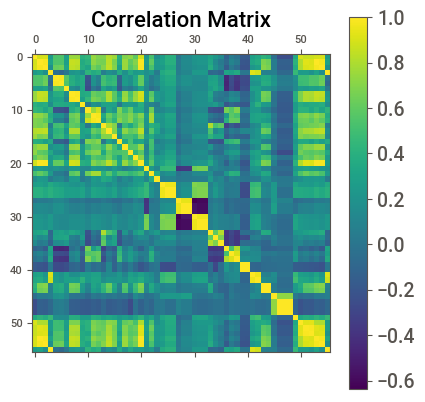

In [42]:
#plot correletoins between features
plt.matshow(df_features.corr())
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
plt.show()

In [357]:
feature_subset=df_features.drop(df_features[to_drop], axis=1)
feature_col_names = feature_subset.columns

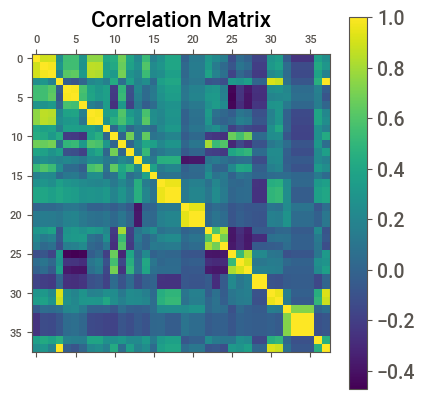

In [37]:
plt.matshow(feature_subset.corr())
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
plt.show()

In [506]:
df_features.columns[56]

'EFG'

In [32]:
for col_idx in range(df_features.shape[1]):
    print(col_idx)
    col_data = df_features.iloc[:, col_idx]
    if np.any(np.isinf(col_data)):
        print('infs')
    # Handle missing or problematic values
    # For example, replace NaN values with the mean
    #X_train = np.nan_to_num(X_train, nan=np.nanmean(X_train))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56


In [33]:
#cast the features onto the same 0 to 1 scale
scalar = MinMaxScaler(feature_range=(0,1))
scaled_features = scalar.fit_transform(df_features)
scaled_features = pd.DataFrame(df_features, columns=feature_col_names)

In [39]:
splayer_eda = sv.analyze(scaled_features)

                                             |          | [  0%]   00:00 -> (? left)

In [29]:
splayer_eda.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [34]:
#setup a target for LDA    
team_stats = pd.read_csv('../data/MSDS_422_FinalProject_Team_Stats_with_Four_Factors.csv')
team_col_list=list(team_stats.columns)
team_stats['TEAM_ID'].value_counts()

TEAM_ID
1610612737    6
1610612738    6
1610612762    6
1610612761    6
1610612759    6
1610612758    6
1610612757    6
1610612756    6
1610612755    6
1610612753    6
1610612760    6
1610612752    6
1610612740    6
1610612750    6
1610612749    6
1610612748    6
1610612763    6
1610612747    6
1610612746    6
1610612754    6
1610612745    6
1610612744    6
1610612765    6
1610612743    6
1610612742    6
1610612739    6
1610612741    6
1610612766    6
1610612751    6
1610612764    6
Name: count, dtype: int64

In [356]:
#NOT NEEDED WITH PCA drop features with higher than 0.6 correlation in more than one pair
corr=df_features.corr()
upper = corr.where(np.triu(np.ones(corr.shape),k=1).astype(bool))
threshold = 0.6
to_drop = [column for column in upper.columns if sum(abs(upper[column])>threshold)>4]

In [213]:
team_stats['W_PCT'].describe()

count    180.000000
mean       0.499189
std        0.143372
min        0.159000
25%        0.402000
50%        0.518000
75%        0.610250
max        0.780000
Name: W_PCT, dtype: float64

In [35]:
bin_edges = [0.15,0.402,0.61,1]
tiers = ['low', 'med', 'high']
team_stats['W_Cat'] = np.nan
team_stats['W_Cat'] = pd.cut(team_stats['W_PCT'], bins=bin_edges, labels=tiers)
team_stats['W_Cat'].value_counts()

W_Cat
med     89
low     46
high    45
Name: count, dtype: int64

In [303]:
89+46+45

180

In [305]:
sweet_sf=sv.analyze(sf)

                                             |          | [  0%]   00:00 -> (? left)

In [306]:
sweet_sf.show_html('sf_dists')

Report sf_dists was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [215]:
set(team_tar.columns) - set(team_stats.columns)

{'DD2',
 'E_TOV_PCT',
 'E_USG_PCT',
 'FGA_PG',
 'TD3',
 'sp_work_NET_RATING',
 'sp_work_OFF_RATING',
 'sp_work_PACE'}

In [19]:
len(df_profiles['TEAM_ABBREVIATION'].unique())

36

In [245]:
team_stats['TEAM_NAME'].value_counts()

TEAM_NAME
Atlanta Hawks             6
Boston Celtics            6
Utah Jazz                 6
Toronto Raptors           6
San Antonio Spurs         6
Sacramento Kings          6
Portland Trail Blazers    6
Phoenix Suns              6
Philadelphia 76ers        6
Orlando Magic             6
Oklahoma City Thunder     6
New York Knicks           6
New Orleans Pelicans      6
Minnesota Timberwolves    6
Milwaukee Bucks           6
Miami Heat                6
Memphis Grizzlies         6
Los Angeles Lakers        6
LA Clippers               6
Indiana Pacers            6
Houston Rockets           6
Golden State Warriors     6
Detroit Pistons           6
Denver Nuggets            6
Dallas Mavericks          6
Cleveland Cavaliers       6
Chicago Bulls             6
Charlotte Hornets         6
Brooklyn Nets             6
Washington Wizards        6
Name: count, dtype: int64

In [217]:
team_stats[['TEAM_ID','W_Cat']].head()

,TEAM_ID,W_Cat
0,1610612737,lowest
1,1610612738,high
2,1610612751,low
3,1610612766,low
4,1610612741,lowest


In [150]:
print(pd.Series(range(0,6)))

0    0
1    1
2    2
3    3
4    4
5    5
dtype: int64


In [36]:
sf = pd.concat([df_profiles[['TEAM_ABBREVIATION','TEAM_ID',"PLAYER_ID","PLAYER_NAME"]], scaled_features], axis = 1)
#sf['TW_Cat'] = np.nan
c=0
sub_size = len(sf)/5
tsub_size = len(team_stats)/6
seasons = pd.Series(range(0,5)) #seasons 2019-20 to 2023-24
df_Tmerg = pd.DataFrame()
for s in seasons:
    start = s*sub_size
    tstart = (s+1)*tsub_size
    
    last = start + sub_size + 1
    tlast = tstart + tsub_size + 1
    print("{},{}".format(start,last))
    print("{},{}".format(tstart,tlast))
    stemp = pd.merge(sf.iloc[int(start):int(last)],
                        team_stats.iloc[int(tstart):int(tlast)][['TEAM_ID','W_Cat']],
                        on = 'TEAM_ID', how='left')
    df_Tmerg=pd.concat([df_Tmerg,stemp], axis=0)
    c = c + len(stemp)
    print(len(stemp))

0.0,2328.0
30.0,61.0
2417
2327.0,4655.0
60.0,91.0
2402
4654.0,6982.0
90.0,121.0
2403
6981.0,9309.0
120.0,151.0
2408
9308.0,11636.0
150.0,181.0
2327


In [159]:
sf['TW_Cat'].head

<bound method NDFrame.head of 0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
11630   NaN
11631   NaN
11632   NaN
11633   NaN
11634   NaN
Name: TW_Cat, Length: 11635, dtype: float64>

In [ ]:
pca_accuracy=clf.

In [203]:
nba_teams_set = {
    "Atlanta Hawks", "Boston Celtics", "Brooklyn Nets", "Charlotte Hornets", "Chicago Bulls",
    "Cleveland Cavaliers", "Dallas Mavericks", "Denver Nuggets", "Detroit Pistons", "Golden State Warriors",
    "Houston Rockets", "Indiana Pacers", "LA Clippers", "Los Angeles Lakers", "Memphis Grizzlies",
    "Miami Heat", "Milwaukee Bucks", "Minnesota Timberwolves", "New Orleans Pelicans", "New York Knicks",
    "Oklahoma City Thunder", "Orlando Magic", "Philadelphia 76ers", "Phoenix Suns", "Portland Trail Blazers",
    "Sacramento Kings", "San Antonio Spurs", "Toronto Raptors", "Utah Jazz", "Washington Wizards"
}

In [244]:
#team_stats.iloc[int(tstart):int(tlast)][['TEAM_NAME']].value_counts()
#geting team repeats in this, bad.
#nba_teams_set.issubset(set(team_stats.iloc[int(tstart):int(tlast)][['TEAM_NAME']]['TEAM_NAME']))
set(team_stats.iloc[int(tstart):int(tlast)][['TEAM_NAME']]['TEAM_NAME']) - nba_teams_set

set()

In [240]:
len(set(team_stats.iloc[int(tstart):int(tlast)][['TEAM_NAME']]['TEAM_NAME']))

30

In [222]:
(pd.DataFrame(team_stats.iloc[int(tstart):int(tlast)][['TEAM_NAME']].value_counts()).sort_values(by='TEAM_NAME'))

,count
TEAM_NAME,
Atlanta Hawks,1
Boston Celtics,1
Brooklyn Nets,1
Charlotte Hornets,1
Chicago Bulls,1
Cleveland Cavaliers,1
Dallas Mavericks,1
Denver Nuggets,1
Detroit Pistons,1


In [442]:
df_Tmerg['W_Cat'].value_counts()

W_Cat
med     6133
high    2972
low     2852
Name: count, dtype: int64

In [262]:
df_Tmerg.columns

Index(['TEAM_ABBREVIATION', 'TEAM_ID', 'PLAYER_ID', 'PLAYER_NAME', 'W_PCT',
       'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
       'FT_PCT', 'REB', 'STL', 'PTS', 'PLUS_MINUS', 'DD2', 'TD3',
       'E_OFF_RATING', 'OFF_RATING', 'sp_work_OFF_RATING', 'E_DEF_RATING',
       'DEF_RATING', 'sp_work_NET_RATING', 'AST_PCT', 'AST_TO', 'AST_RATIO',
       'OREB_PCT', 'DREB_PCT', 'REB_PCT', 'TM_TOV_PCT', 'E_TOV_PCT', 'EFG_PCT',
       'E_USG_PCT', 'E_PACE', 'PACE', 'PACE_PER40', 'sp_work_PACE', 'FGA_PG',
       'TW_Cat', 'W_Cat'],
      dtype='object')

In [37]:
category_mapping = {'low': 0, 'med': 1, 'high': 2}  # Add more categories as needed

# Map the string categories to integer categories using the dictionary
df_Tmerg['W_Cat_Int'] = df_Tmerg['W_Cat'].map(category_mapping)

print(df_Tmerg[['W_Cat_Int']].values.ravel()[:,])

[1 0 1 ... 2 0 1]


In [38]:
Y=df_Tmerg[['W_Cat_Int']].values.ravel()[:,]
X=df_Tmerg.iloc[:,6:]
X=X.drop(columns=['W_Cat','W_Cat_Int'])
xcols=X.columns

In [52]:
for col_idx in range(X.shape[1]):
    print(col_idx)
    col_data = X.iloc[:, col_idx]
    if np.any(np.isnan(col_data)):
        print('nan')
        print(X.columns[col_idx])
#X=X.drop(columns=['FG_PCT_advanced'])
scalar = MinMaxScaler(feature_range=(0,1))
xcols=X.columns
X = scalar.fit_transform(X)
X = pd.DataFrame(X, columns=xcols)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53


In [312]:
X['FG3_PCT']

0       0.071154
1       0.040915
2       0.110963
3       0.134305
4       0.047701
          ...   
2402    0.101228
2403    0.142268
2404    0.060116
2405    0.080988
2406    0.154413
Name: FG3_PCT, Length: 12037, dtype: float64

In [539]:
categorical_columns = X.select_dtypes(include=['category']).columns.tolist()
categorical_columns

[]

In [46]:
X['PTS'].describe()

count    11957.000000
mean        -0.358602
std          2.938659
min        -30.700000
25%         -2.000000
50%         -0.500000
75%          1.200000
max         28.000000
Name: PTS, dtype: float64

In [53]:
# NORMALITY TRANSFORM BREAKS PCA variance disitribution Loop through each column in the DataFrame

X_normalized=pd.DataFrame(columns=X.columns)
for column in X.columns:
    print(f"Checking normality for column: {column}")

    # Apply normality check and transformation
    X_normalized[column] = check_normality_and_transform(X[column])

# Print DataFrame after transformation
X

Checking normality for column: FGM
Column is not normally distributed (p-value=0.0000). Applying Box-Cox transformation.
Checking normality for column: FGA
Column is not normally distributed (p-value=0.0000). Applying Box-Cox transformation.
Checking normality for column: FG_PCT
Column is not normally distributed (p-value=0.0000). Applying Box-Cox transformation.
Checking normality for column: FG3M
Column is not normally distributed (p-value=0.0000). Applying Box-Cox transformation.
Checking normality for column: FG3A
Column is not normally distributed (p-value=0.0000). Applying Box-Cox transformation.
Checking normality for column: FG3_PCT
Column is not normally distributed (p-value=0.0000). Applying Box-Cox transformation.
Checking normality for column: FTM
Column is not normally distributed (p-value=0.0000). Applying Box-Cox transformation.
Checking normality for column: FTA
Column is not normally distributed (p-value=0.0000). Applying Box-Cox transformation.
Checking normality for 

,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,...,E_PACE,PACE,PACE_PER40,sp_work_PACE,PIE,POSS,FGM_advanced,FGA_advanced,FGM_PG,FGA_PG
0,0.143885,0.444,0.000000,0.007576,0.000,0.095238,0.106870,0.712,0.236364,0.217391,...,0.072507,0.072520,0.072507,0.734698,0.369701,0.147239,0.149103,0.147541,0.143885,0.444
1,0.208633,0.406,0.150943,0.159091,0.391,0.047619,0.038168,0.833,0.054545,0.069565,...,0.071908,0.071922,0.071908,0.730749,0.163030,0.079755,0.088357,0.196721,0.208633,0.406
2,0.338129,0.473,0.132075,0.166667,0.312,0.190476,0.198473,0.768,0.072727,0.321739,...,0.081820,0.081820,0.081820,0.739365,0.644753,0.345603,0.328578,0.360656,0.338129,0.473
3,0.284173,0.457,0.000000,0.000000,0.000,0.285714,0.290076,0.787,0.472727,0.400000,...,0.082252,0.082259,0.082252,0.735057,0.629048,0.303681,0.299126,0.295082,0.284173,0.457
4,0.086331,0.403,0.000000,0.000000,0.333,0.057143,0.068702,0.619,0.236364,0.156522,...,0.088539,0.088525,0.088539,0.728056,0.231828,0.065440,0.073171,0.081967,0.086331,0.403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11952,0.327338,0.481,0.169811,0.219697,0.294,0.161905,0.175573,0.743,0.309091,0.313043,...,0.113683,0.113670,0.113683,0.733800,0.338290,0.219836,0.205706,0.360656,0.327338,0.481
11953,0.539568,0.452,0.452830,0.515152,0.349,0.333333,0.312977,0.854,0.054545,0.417391,...,0.097585,0.097625,0.097585,0.737749,0.247394,0.173824,0.173033,0.557377,0.539568,0.452
11954,0.097122,0.437,0.018868,0.030303,0.250,0.076190,0.091603,0.698,0.218182,0.086957,...,0.102342,0.102335,0.102342,0.728415,0.128145,0.056237,0.057984,0.098361,0.097122,0.437
11955,0.266187,0.397,0.207547,0.280303,0.307,0.114286,0.114504,0.827,0.127273,0.243478,...,0.105867,0.105887,0.105867,0.731287,0.299653,0.153374,0.173953,0.237705,0.266187,0.397


In [319]:
sv_transed_X=sv.analyze(X)

                                             |          | [  0%]   00:00 -> (? left)

In [321]:
sv_transed_X.show_html('transed_Tstats_dists.html')

Report transed_Tstats_dists.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [209]:
from sklearn.decomposition import PCA
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
# Assuming X_train is your training data with zero-inflated features
# Initialize PCA with the desired number of components
pca = PCA()
# Fit PCA to the training data
X_train_pca = pca.fit_transform(X_train)

# Now X_train_pca contains the transformed data with reduced dimensions


In [304]:
58+11+6+4

79

In [254]:
# Calculate the variance explained by each principal component
variance_explained = pca.explained_variance_ratio_

# Display the variance explained by each principal component
for i, variance in enumerate(variance_explained):
    print(f"Principal Component {i+1}: {variance:.2f} variance explained")

# Total variance explained
total_variance_explained = np.sum(variance_explained)
print(f"Total variance explained: {total_variance_explained:.2f}")

Principal Component 1: 0.58 variance explained
Principal Component 2: 0.11 variance explained
Principal Component 3: 0.06 variance explained
Principal Component 4: 0.04 variance explained
Principal Component 5: 0.04 variance explained
Principal Component 6: 0.03 variance explained
Principal Component 7: 0.02 variance explained
Principal Component 8: 0.02 variance explained
Principal Component 9: 0.01 variance explained
Principal Component 10: 0.01 variance explained
Principal Component 11: 0.01 variance explained
Principal Component 12: 0.01 variance explained
Principal Component 13: 0.01 variance explained
Principal Component 14: 0.01 variance explained
Principal Component 15: 0.01 variance explained
Principal Component 16: 0.01 variance explained
Principal Component 17: 0.00 variance explained
Principal Component 18: 0.00 variance explained
Principal Component 19: 0.00 variance explained
Principal Component 20: 0.00 variance explained
Principal Component 21: 0.00 variance explained
P

In [236]:
names = [
    "Field Goals Made", "Field Goals Attempted", "Three-Point Field Goal Percentage",
    "Free Throws Made", "Free Throws Attempted", "Free Throw Percentage",
    "Offensive Rebounds", "Defensive Rebounds", "Total Rebounds",
    "Assists", "Turnovers", "Steals", "Blocks", "Opponent Blocks",
    "Personal Fouls", "Personal Fouls Drawn", "Points", "Triple Doubles",
    "Offensive Rating", "Estimated Defensive Rating", "Defensive Rating",
    "Net Rating", "Assist Percentage", "Assist to Turnover Ratio",
    "Assist Ratio", "Offensive Rebound Percentage", "Defensive Rebound Percentage",
    "Rebound Percentage", "Team Turnover Percentage", "Estimated Turnover Percentage",
    "Effective Field Goal Percentage", "True Shooting Percentage", "Usage Percentage",
    "Estimated Pace", "Pace", "Pace Per 40 Minutes", "Player Impact Estimate",
    "Possessions", "Advanced Field Goals Made", "Advanced Field Goals Attempted",
    "Field Goals Made Per Game", "Field Goals Attempted Per Game",de
    "Defensive Rating", "Worked Defensive Rating", "Estimated Net Rating", "Net Rating",
    "Worked Net Rating", "Assist Percentage", "Assist to Turnover Ratio", "Assist Ratio",
    "Offensive Rebound Percentage", "Defensive Rebound Percentage", "Total Rebound Percentage",
    "Team Turnover Percentage", "Estimated Turnover Percentage", "Effective Field Goal Percentage",
    "True Shooting Percentage", "Usage Percentage", "Estimated Pace", "Pace", "Pace Per 40 Minutes",
    "Worked Pace", "Player Impact Estimate", "Possessions", "Advanced Field Goals Made",
    "Advanced Field Goals Attempted", "Field Goals Made Per Game", "Field Goals Attempted Per Game"
]
]
df = pd.DataFrame({
    'Column Names': X.columns
    
})
df2 = pd.DataFrame({
    'Column Names': names

})
df2.to_excel('feature_names.xlsx', index=False)

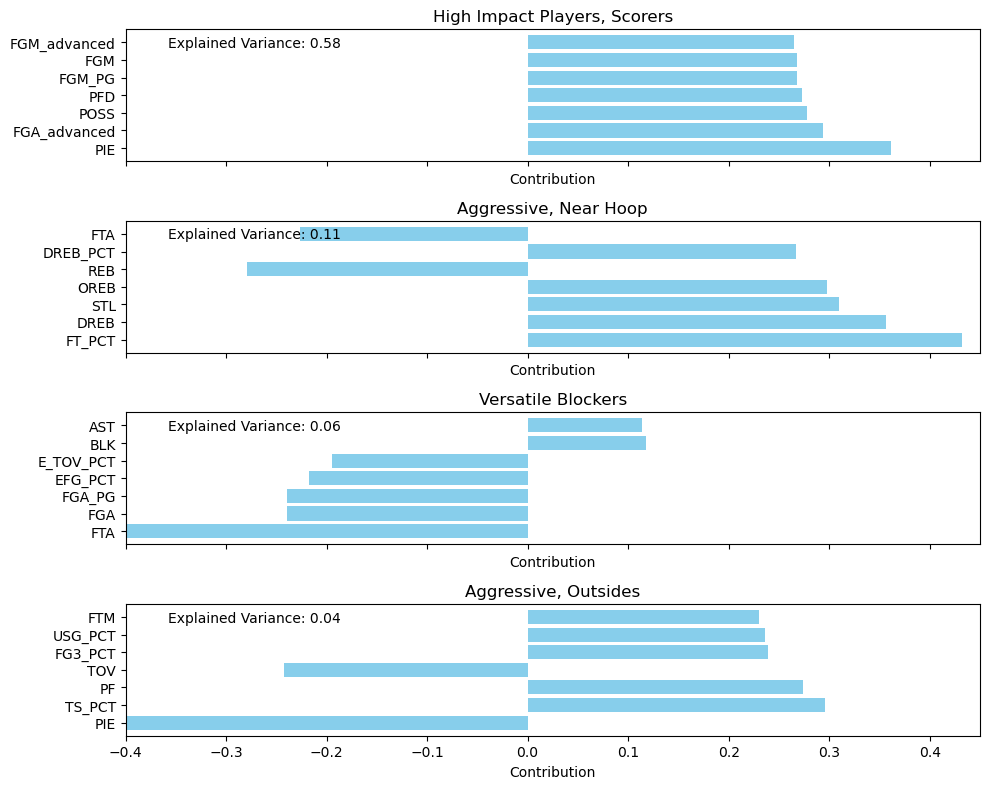

In [284]:
archetypes = ['High Impact Players, Scorers','Aggressive, Near Hoop', 'Versatile Blockers', 'Aggressive, Outsides']
# Get the names of the features (assuming X is a DataFrame)
feature_names = X.columns

# Number of top features to display for each principal component
top_features_count = 7

fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

for i in range(4):
    # Sort features based on their contribution to the principal component
    sorted_indices = np.argsort(np.abs(pca.components_[i]))
    top_feature_indices = sorted_indices[-top_features_count:]
    top_feature_names = feature_names[top_feature_indices]
    top_feature_contributions = pca.components_[i][top_feature_indices]

    axes[i].barh(range(top_features_count), top_feature_contributions, color='skyblue')
    axes[i].set_yticks(range(top_features_count))
    axes[i].set_yticklabels(top_feature_names)
    axes[i].set_title(f'{archetypes[i]}')
    axes[i].invert_yaxis()  # Invert y-axis to have the highest contribution at the top
    axes[i].set_xlabel('Contribution')
    ##axes[i].title('')
    axes[i].set_xlim(-0.4,0.45)

    # Display explained variance ratio in the top left corner
    axes[i].text(0.05, 0.95, f'Explained Variance: {explained_var_ratio[i]:.2f}',
                 transform=axes[i].transAxes, ha='left', va='top', fontsize=10, color='black')

plt.tight_layout()
plt.savefig('../figures/PCA_Arch.png')
plt.show()


In [311]:
#Tuned LDA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

# Define the pipeline
pipeline = Pipeline([
 #   ('scaler', StandardScaler()),  # Apply standard scaling
    ('lda', LinearDiscriminantAnalysis())  # LDA model
])

# Define parameter grid
param_grid = {
    'lda__solver': ['svd'],  # Different solvers
    #'lda__shrinkage': [None, 'auto', 0.1, 0.5, 1.0]  # Different shrinkage values
}

# Create grid search object
lda = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Perform grid search
mylda = lda.fit(X_train, y_train)

# Get best parameters and best score
best_params = lda.best_params_
best_score = lda.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'lda__solver': 'svd'}
Best Score: 0.5106408970279217


AttributeError: 'Pipeline' object has no attribute 'scalings_'

In [62]:
# Get the explained variance ratio for each component
explained_variance_ratio = lda.explained_variance_ratio_

# Print the explained variance ratio for each component
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Explained Variance Ratio for Component {i + 1}: {ratio:.4f}")

AttributeError: 'GridSearchCV' object has no attribute 'explained_variance_ratio_'

In [ ]:
#LDA Predict Tuning
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming lda_probs contains the posterior probabilities obtained from LDA
# lda_probs is assumed to be a 2D array with shape (n_samples, n_classes)

# Define the range of thresholds to try
thresholds_to_try = np.linspace(0.1, 0.9, 9)  # Example: 9 thresholds from 0.1 to 0.9

# Initialize lists to store evaluation metrics for each threshold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

lda_probs = lda.predict_proba(X_train)
true_classes = y_train

# Loop through each threshold and evaluate performance
for threshold in thresholds_to_try:
    # Assign classes based on the threshold
    predicted_classes = np.where(lda_probs[:, 1] >= threshold, 1, 0)  # Example: binary classification

    # Evaluate performance using the threshold
    accuracy = accuracy_score(true_classes, predicted_classes)
    precision = precision_score(true_classes, predicted_classes,average='micro')
    recall = recall_score(true_classes, predicted_classes,average='micro')
    f1 = f1_score(true_classes, predicted_classes,average='micro')

    # Append evaluation metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Optionally, plot the evaluation metrics as a function of threshold
import matplotlib.pyplot as plt

plt.plot(thresholds_to_try, accuracy_scores, label='Accuracy')
plt.plot(thresholds_to_try, precision_scores, label='Precision')
plt.plot(thresholds_to_try, recall_scores, label='Recall')
plt.plot(thresholds_to_try, f1_scores, label='F1-score')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Performance Metrics vs. Threshold')
plt.legend()
plt.show()


In [ ]:
#PLOT LDA
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define custom color map with three distinct colors
cmap = ListedColormap(['red', 'blue', 'lime'])

# Assuming X_train_lda contains the LDA-transformed features with reduced dimensionality
# Assuming y_train contains the corresponding labels
X_train_lda=lda.transform(X_train)
# Create scatter plot with custom color map
plt.figure(figsize=(8, 6))
plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train, cmap=cmap, s=1)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA Reduced Feature Subspace')
plt.colorbar(ticks=[0, 1, 2], label='Class', format=plt.FuncFormatter(lambda x, _: ['red', 'blue', 'bright green'][int(x)]))
plt.savefig('../figures/LDASpace.png')
plt.show()

In [68]:
#more drops for overly general categories related to the team rather than the player
undroppedX=X
X=X.drop(columns=['E_USG_PCT','OFF_RATING','E_OFF_RATING','E_USG_PCT'])
X=X.drop(columns=['FG_PCT','FG3M','FG3A', 'PLUS_MINUS', 'DD2'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [612]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming X_train and y_train are your labeled training data
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5259197324414716


In [ ]:
#Random Forest Feature Importance
# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Get feature names
feature_names = X_train.columns  # Assuming X_train is a DataFrame with named columns

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), sorted_feature_importances, align='center')
plt.xticks(range(len(feature_importances)), sorted_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

In [74]:
X_pca = pca.fit_transform(X_train)

In [ ]:
# Define custom color map with three distinct colors
cmap = ListedColormap(['red', 'blue', 'lime'])

# Create scatter plot with custom color map
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=cmap, s=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Reduced Feature Subspace')
plt.colorbar(ticks=[0, 1, 2], label='Class', format=plt.FuncFormatter(lambda x, _: ['red', 'blue', 'lime'][int(x)]))
plt.savefig('../figures/PCASpace.png')
plt.show()

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 'med'

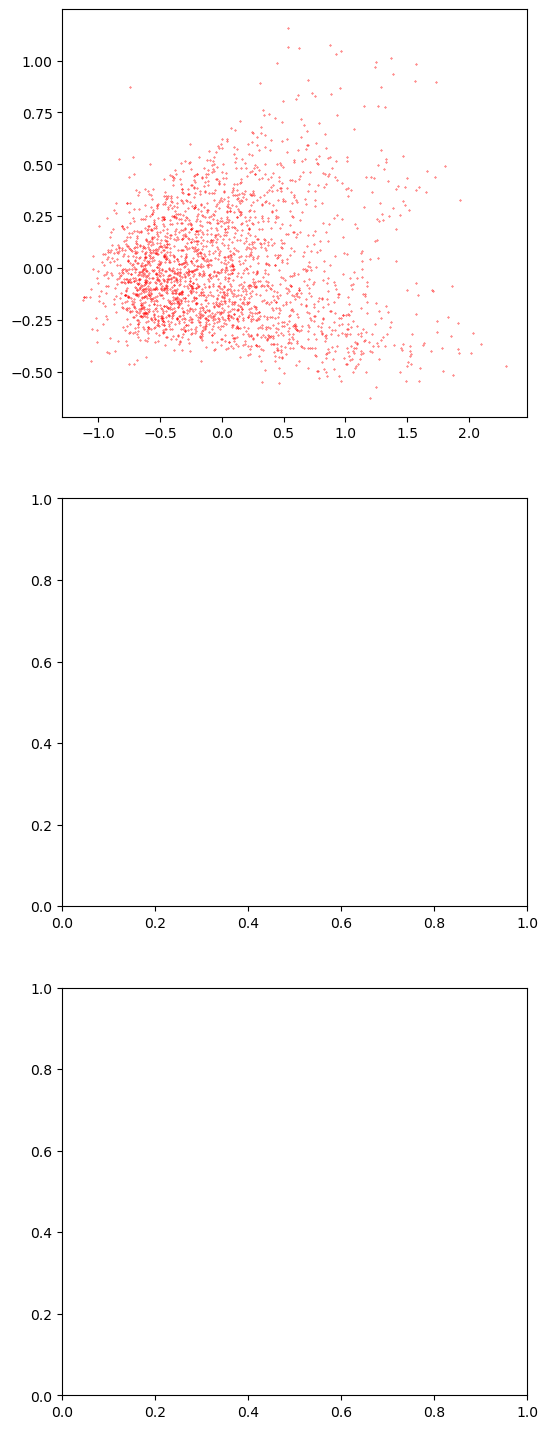

In [200]:
#PLOT PCA
unique_classes = sorted(set(y_train))

# Define colors for each class
colors = ['red', 'lightblue', 'lime']
p_size=.1
# Create subplots for each pair combination of adjacent target variable classes
fig, axes = plt.subplots(3, 1, figsize=(6, 18))  # Change the layout to 3 rows and 1 column

# Loop through each pair combination of adjacent target variable classes and plot
for i, ax in enumerate(axes):
    class_indices1 = [j for j, label in enumerate(y_train) if label == unique_classes[i]]
    class_indices2 = [j for j, label in enumerate(y_train) if label == unique_classes[(i + 1) % len(unique_classes)]]
    ax.scatter(X_pca[class_indices1, 0], X_pca[class_indices1, 1], s=p_size, c=colors[i], label=f'Class {unique_classes[i]}')
    ax.scatter(X_pca[class_indices2, 0], X_pca[class_indices2, 1], s=p_size, c=colors[(i + 1) % len(colors)], label=f'Class {unique_classes[(i + 1) % len(unique_classes)]}')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_title(f'PCA Reduced Feature Subspace (Classes {unique_classes[i]} and {unique_classes[(i + 1) % len(unique_classes)]})')
    ax.legend()

plt.tight_layout()
plt.savefig('../figures/PCASpaceSubplots.png')
plt.show()

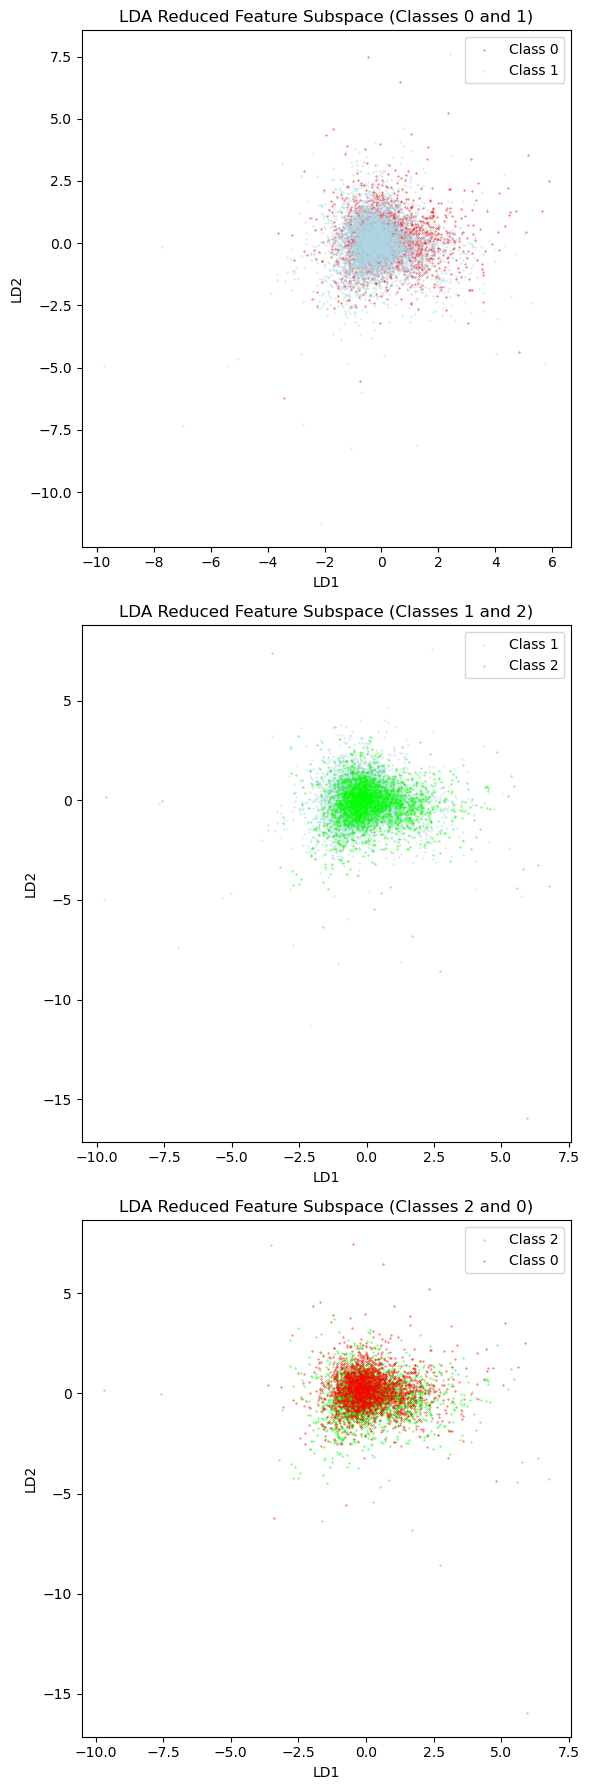

In [84]:
#PLOT LDA
unique_classes = sorted(set(y_train))

# Define colors for each class
colors = ['red', 'lightblue', 'lime']
p_size=.1
# Create subplots for each pair combination of adjacent target variable classes
fig, axes = plt.subplots(3, 1, figsize=(6, 18))  # Change the layout to 3 rows and 1 column

# Loop through each pair combination of adjacent target variable classes and plot
for i, ax in enumerate(axes):
    class_indices1 = [j for j, label in enumerate(y_train) if label == unique_classes[i]]
    class_indices2 = [j for j, label in enumerate(y_train) if label == unique_classes[(i + 1) % len(unique_classes)]]
    ax.scatter(X_train_lda[class_indices1, 0], X_train_lda[class_indices1, 1], s=p_size, c=colors[i], label=f'Class {unique_classes[i]}')
    ax.scatter(X_train_lda[class_indices2, 0], X_train_lda[class_indices2, 1], s=p_size, c=colors[(i + 1) % len(colors)], label=f'Class {unique_classes[(i + 1) % len(unique_classes)]}')
    ax.set_xlabel('LD1')
    ax.set_ylabel('LD2')
    ax.set_title(f'LDA Reduced Feature Subspace (Classes {unique_classes[i]} and {unique_classes[(i + 1) % len(unique_classes)]})')
    ax.legend()

plt.tight_layout()
plt.savefig('../figures/LDASpace_subplots.png')
plt.show()
    
    

In [80]:
# Get the feature contributions for each principal component
topXfeatures = 8
feature_contributions = pca.components_[:topXfeatures] 

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (57,) and arg 1 with shape (46,).

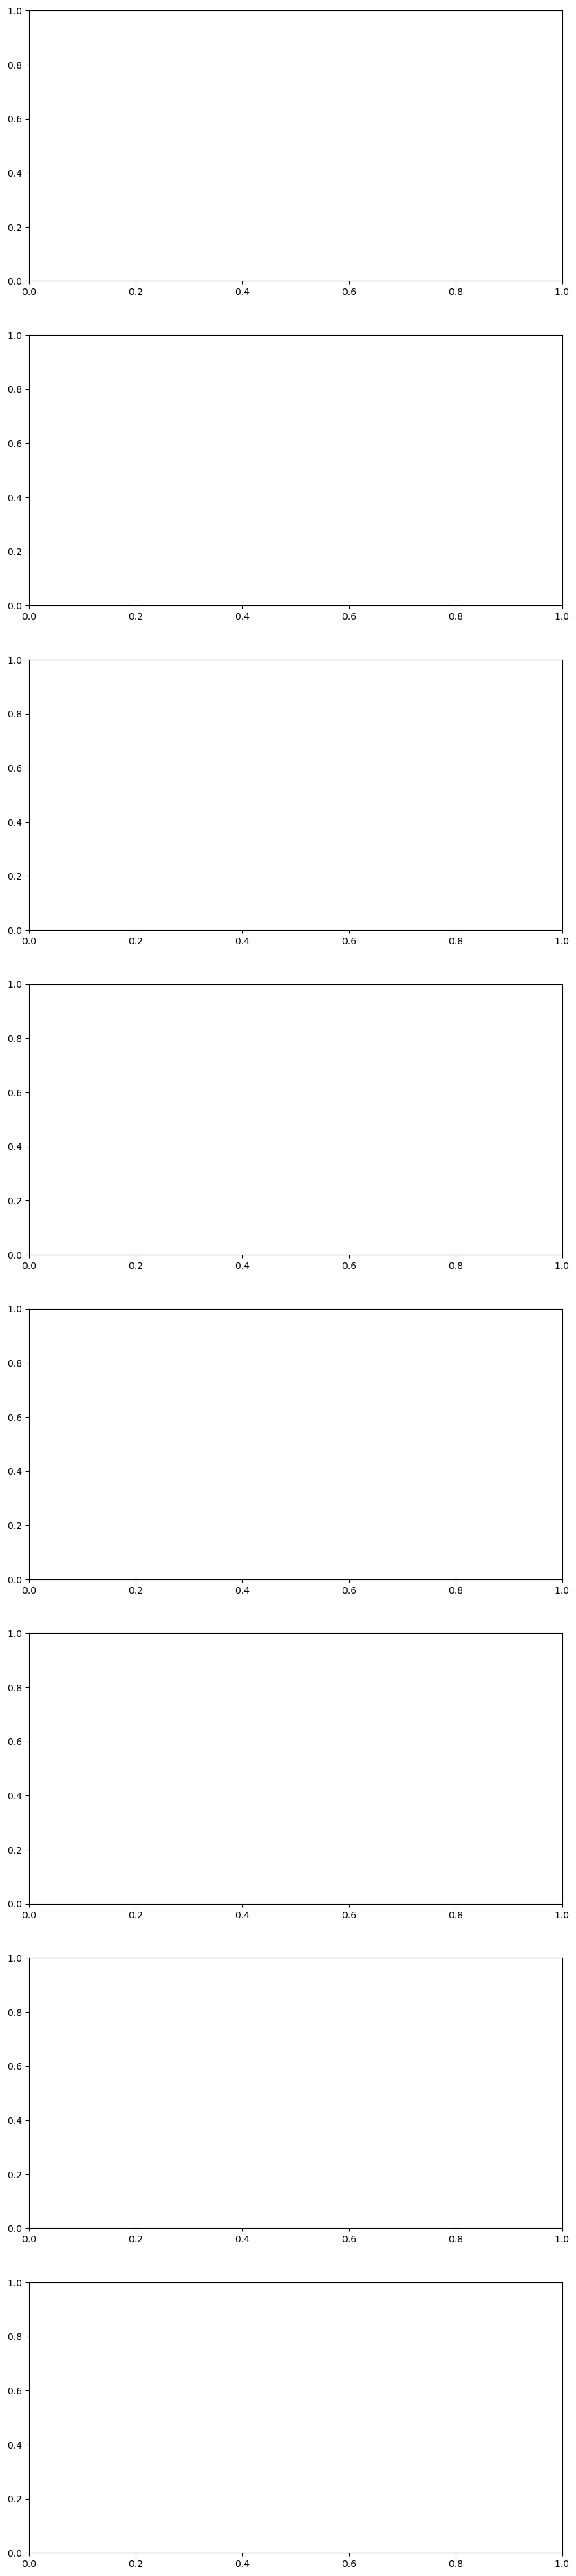

In [81]:
num_components = len(feature_contributions)
num_features = len(feature_col_names)
fig, axes = plt.subplots(num_components, 1, figsize=(10, 6*num_components))

for i in range(num_components):
    ax = axes[i]
    ax.bar(np.arange(num_features), feature_contributions[i], color='blue')
    ax.set_title(f"Principal Component {i+1} Feature Contributions")
    ax.set_xlabel("Feature Index")
    ax.set_ylabel("Contribution")
    ax.set_xticks(np.arange(num_features))
    ax.set_xticklabels(feature_col_names, rotation=90)
    
    ax.text(0.95, 0.95, f'Variance Explained: {p_explained[i]:.2f}',
            verticalalignment='top', horizontalalignment='right',
            transform=ax.transAxes, fontsize=10, color='black', bbox=dict(facecolor='none', edgecolor='none'))
    
    #plt.savefig(f"pc{i+1}_feature_contributions.jpg", bbox_inches='tight', dpi=300)
    #plt.close(fig)

plt.tight_layout()
plt.savefig('../figures/LDASpaceSubplots.png')
plt.show()

In [0]:
num_components = len(feature_contributions)
num_features = len(feature_col_names)
fig_scale=1.2
fig, axs = plt.subplots(2, 2, figsize=(20*fig_scale, 12*fig_scale))
#fig, axes = plt.subplots(num_components, 1, figsize=(10, 6*num_components))

for i in range(num_components):
    #ax = axes[i]
    row = i // 2  
    col = i % 2
    axs[row, col].bar(np.arange(num_features), feature_contributions[i], color='blue')
    axs[row, col].set_title(f"Principal Component {i + 1} Feature Contributions")
    #axs[row, col].set_xlabel("Feature Index")
    axs[row, col].set_ylabel("Contribution")
    axs[row, col].set_xticks(np.arange(num_features))
    if i == 2 or i == 3:
        axs[row, col].xaxis.tick_top()
        axs[row, col].set_xticklabels(feature_col_names, rotation=90)
        axs[row, col].set_title(f" ", loc='center')

    axs[row, col].text(0.9, 0.9, f'Variance Explained: {p_explained[i]:.2f}',
                       verticalalignment='top', horizontalalignment='right',
                       transform=axs[row, col].transAxes, fontsize=10, color='black',
                       bbox=dict(facecolor='none', edgecolor='none'))
    


plt.savefig("top4_contributions.jpg", bbox_inches='tight', dpi=300)
plt.close(fig)

plt.show()

In [623]:
#impute nan values
imputer = sk.impute.SimpleImputer(strategy='median')
X_pca = imputer.fit_transform(X_pca)

C:\Users\Eyad\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Eyad\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Eyad\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Eyad\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

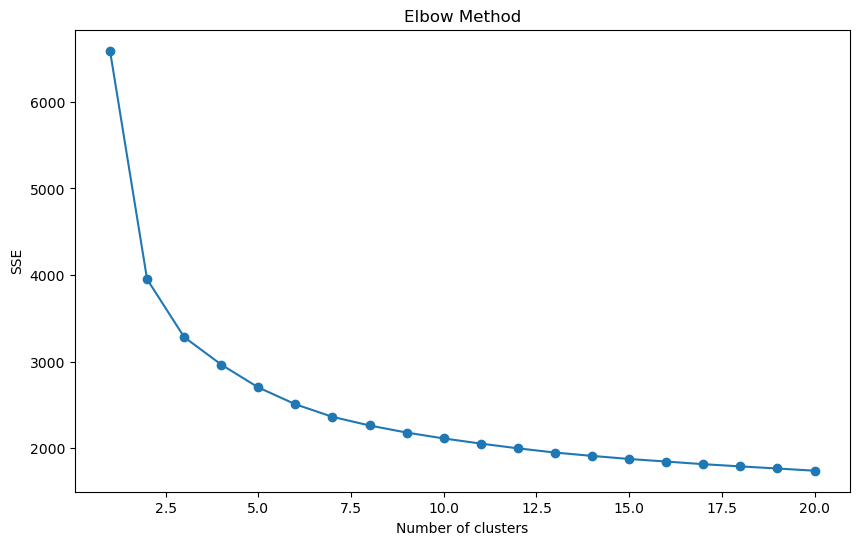

In [82]:
### K-Means Clustering GET ELBOW

from sklearn.cluster import KMeans


# determine the number of clusters (k)
sse = []
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    sse.append(kmeans.inertia_)

# plot SSE for each k
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [258]:
# apply K-Means Clustering to PCA Space
k = 7
pca_clusters = pd.DataFrame(X_pca)
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

pca_clusters['Cluster_KMeans'] = cluster_labels

C:\Users\Eyad\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


C:\Users\Eyad\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Eyad\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Eyad\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Eyad\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

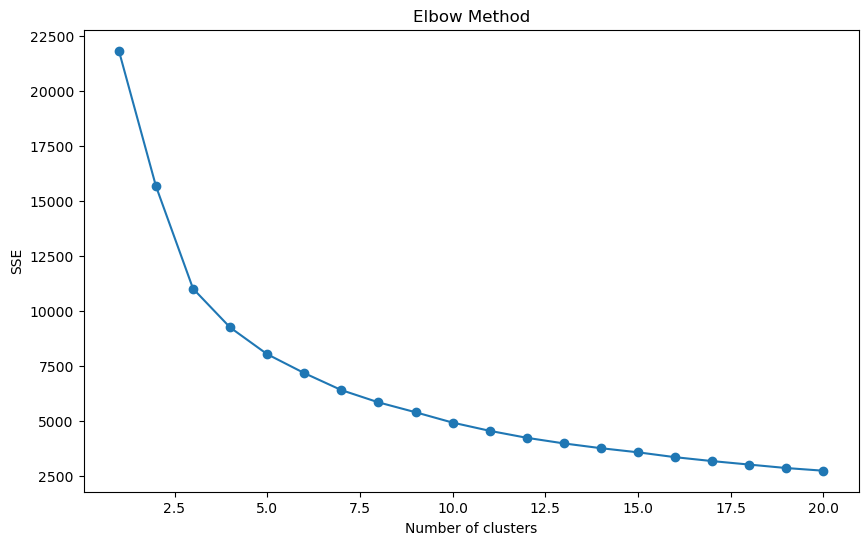

In [99]:
### LDA K-Means Clustering GET ELBOW

from sklearn.cluster import KMeans


# determine the number of clusters (k)
sse = []
for k in range(1, 21):
    kmeans_lda = KMeans(n_clusters=k, random_state=42)
    kmeans_lda.fit(X_train_lda)
    sse.append(kmeans.inertia_)

# plot SSE for each k
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

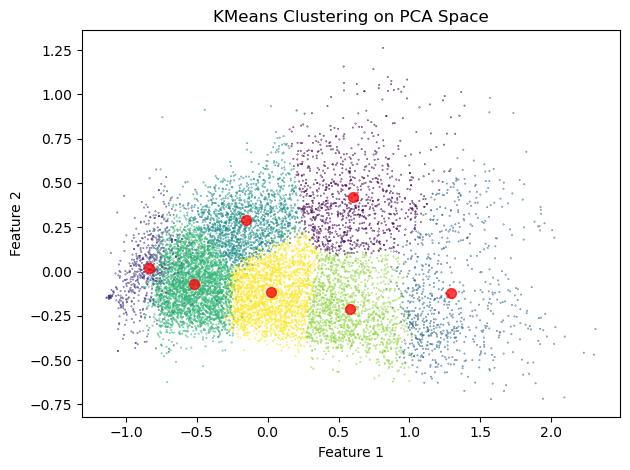

In [158]:
# Plotting the clusters from PCA
color_map = {0: 'red', 1: 'green', 2: 'blue', 3: 'orange', 4: 'yellow', 5: 'cyan', 6: 'magenta'}
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, s=p_size, cmap='viridis')

# Plotting the centroids of the clusters
pca_centers = kmeans.cluster_centers_
plt.scatter(pca_centers[:, 0], pca_centers[:, 1], c='red', s=50, alpha=0.75)

plt.title('KMeans Clustering on PCA Space')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.tight_layout()
plt.savefig('../figures/Kmeans_PCA.png')
plt.show()

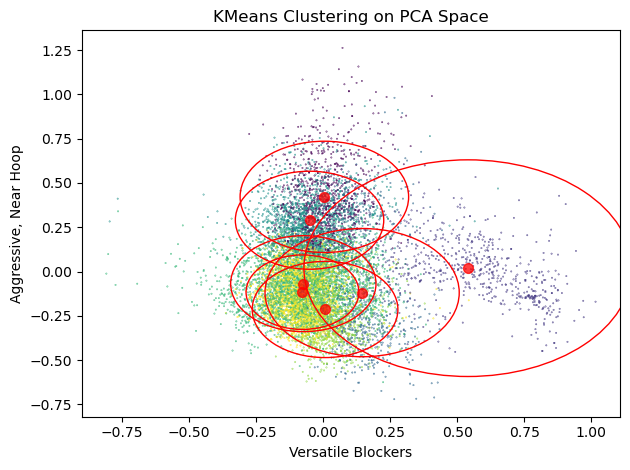

In [299]:
import numpy as np
xpca=2
ypca=1
# Calculate distances of each point to its cluster centroid
distances = np.zeros(len(X_pca), dtype=float)
for i, centroid in enumerate(pca_centers):
    cluster_mask = pca_clusters['Cluster_KMeans'] == i
    centroid_reshaped = np.expand_dims(centroid, axis=0)  # Ensure the centroid shape matches X_pca[cluster_mask]
    distances[cluster_mask] = np.linalg.norm(X_pca[cluster_mask] - centroid_reshaped, axis=1)

# Plotting the clusters from PCA
plt.scatter(X_pca[:, xpca], X_pca[:, ypca], c=cluster_labels, s=p_size, cmap='viridis')

# Plotting circles around each cluster
for i, centroid in enumerate(pca_centers):
    cluster_mask = cluster_labels == i
    plt.gca().add_artist(plt.Circle((centroid[xpca], centroid[ypca]), distances[cluster_mask].std() * 2, color='red', fill=False))

# Plotting the centroids of the clusters
plt.scatter(pca_centers[:, xpca], pca_centers[:, ypca], c='red', s=50, alpha=0.75)

plt.title('KMeans Clustering on PCA Space')
plt.xlabel(archetypes[xpca])
plt.ylabel(archetypes[ypca])
plt.tight_layout()
plt.savefig('../figures/Kmeans_PCA21.png', dpi = 500)
plt.show()


In [279]:
pca_components_subset.shape

(3, 46)

In [278]:
cluster_means.shape

(7, 46)

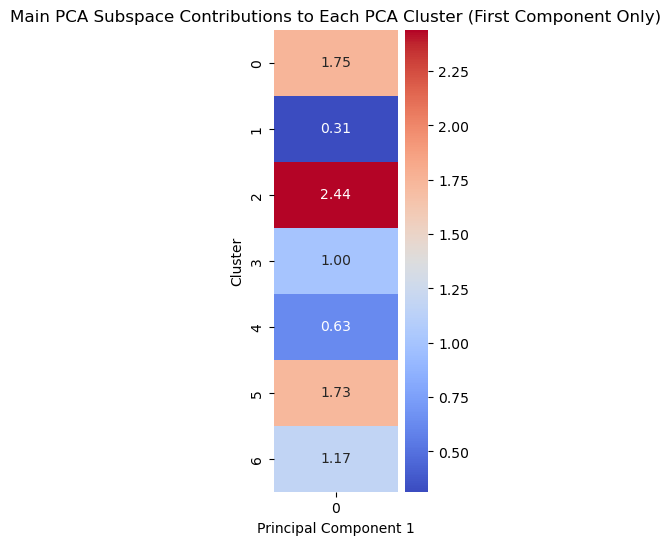

In [331]:
import seaborn as sns

# Assuming you have already fit PCA and clustered your data
# pca_model = PCA(n_components=num_components)
# pca_components = pca_model.components_

# Exclude the first principal component
pca_components_subset = pca_components[0]  # Only the first component

# Calculate mean feature values for each cluster
cluster_means = []
for cluster_label in np.unique(cluster_labels):
    cluster_means.append(X_train[cluster_labels == cluster_label].mean(axis=0))

cluster_means = np.array(cluster_means)

# Calculate contributions of features to the first principal component for each cluster
contributions = np.dot(cluster_means, pca_components_subset.T)

# Plot contributions
plt.figure(figsize=(2, 6))
sns.heatmap(contributions.reshape(-1, 1), cmap='coolwarm', annot=True, fmt='.2f', yticklabels=np.unique(cluster_labels))
plt.xlabel('Principal Component 1')
plt.ylabel('Cluster')
plt.title('Main PCA Subspace Contributions to Each PCA Cluster (First Component Only)')
plt.savefig('../figures/ClusterXPC1.png', dpi=200)
plt.show()

[[ 0.5695693  -0.83707293  0.17996619]
 [ 0.16705039 -0.30167277  0.16294483]
 [ 0.0290517  -0.69630891  0.34257621]
 [ 0.43761584 -0.89231561  0.20382852]
 [ 0.07954465 -0.91548732  0.26967251]
 [-0.06617839 -0.83451489  0.1500666 ]
 [ 0.03152419 -0.91871315  0.12798592]]


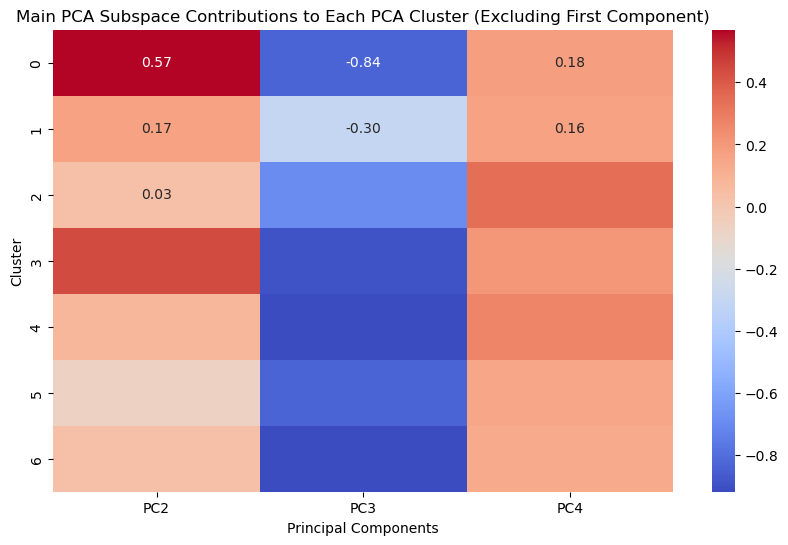

In [332]:
#cross varience explained by clusters

import seaborn as sns

# Assuming you have already fit PCA and clustered your data
# pca_model = PCA(n_components=num_components)
# pca_components = pca_model.components_

# Exclude the first principal component
pca_components_subset = pca_components[1:4]

# Calculate mean feature values for each cluster
cluster_means = []
for cluster_label in np.unique(cluster_labels):
    cluster_means.append(X_train[cluster_labels == cluster_label].mean(axis=0))

cluster_means = np.array(cluster_means)

# Calculate contributions of features to the remaining principal components for each cluster
contributions = np.dot(cluster_means, pca_components_subset.T)

# Plot contributions
print(contributions)

plt.figure(figsize=(10, 6))
sns.heatmap(contributions, cmap='coolwarm', annot=True, fmt='.2f', xticklabels=['PC2', 'PC3', 'PC4'])
plt.xlabel('Principal Components')
plt.ylabel('Cluster')
plt.title('Main PCA Subspace Contributions to Each PCA Cluster (Excluding First Component)')
plt.savefig('../figures/ClusterXPC.png', dpi=200)
plt.show()


In [141]:
X_train_lda.iloc[:,1]

0       -0.245769
1       -0.108166
2       -0.373924
3       -0.546738
4        0.025172
           ...   
10756   -0.015191
10757    0.078071
10758   -1.040274
10759   -0.041046
10760    0.450887
Name: 1, Length: 10761, dtype: float64

In [143]:
# apply K-Means Clustering to LDA Space
k = 7
X_train_lda=pd.DataFrame(X_train_lda)
lda_clusters = X_train_lda
kmeans_lda = KMeans(n_clusters=k, random_state=42)
X_train_lda.columns =X_train_lda.columns.astype('string')
lda_cluster_labels = kmeans_lda.fit_predict(X_train_lda)

lda_clusters['Cluster_KMeans'] = lda_cluster_labels

C:\Users\Eyad\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


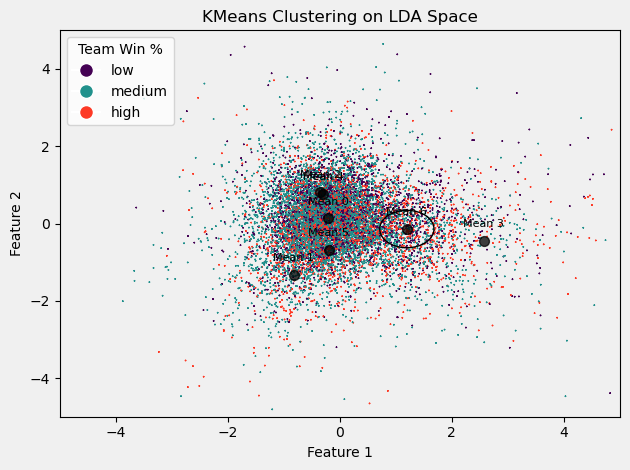

In [286]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

colors = [(0.267004, 0.004874, 0.329415),
(0.127568, 0.566949, 0.550556),
(0.993248, 0.225212, 0.145083)]
custom_cmap = LinearSegmentedColormap.from_list('custom_cividis', colors)

# Calculate distances of each point to its cluster centroid
distances = np.zeros(len(X_train_lda), dtype=float)
for i, centroid in enumerate(centers):
    cluster_mask = lda_clusters['Cluster_KMeans'] == i
distances[cluster_mask] = np.linalg.norm(X_train_lda[cluster_mask] - centroid, axis=1)

# Plotting the clusters from LDA
scatter = plt.scatter(X_train_lda.iloc[:, 0], X_train_lda.iloc[:, 1], c=y_train, s=p_size, cmap=custom_cmap, marker='*')

# Plotting circles around each cluster centroid
for i, centroid in enumerate(centers):
    cluster_mask = lda_clusters['Cluster_KMeans'] == i
radius = distances[cluster_mask].std() * 2  # Adjust the factor as needed
plt.gca().add_artist(plt.Circle((centroid[0], centroid[1]), radius, color='black', fill=False))

# Plotting the centroids of the clusters
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=0.75)

# Annotating each centroid with its label
for i, centroid in enumerate(centers):
    plt.annotate(f'Mean {i}', (centroid[0], centroid[1]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

plt.gcf().set_facecolor('#F0F0F0')  # Medium gray background
plt.gca().set_facecolor('#F0F0F0')  # Medium gray background for the plot area

# Create legend handles and labels
legend_handles = [plt.Line2D([0], [0],marker='o', color='w', markersize=10, markerfacecolor=color) for color in colors]
legend_labels = ['low', 'medium', 'high']

# Add legend for colors
plt.legend(handles=legend_handles, labels=legend_labels, title='Team Win %')

plt.title('KMeans Clustering on LDA Space')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.tight_layout()
plt.savefig('../figures/KmeansLDA3.png', dpi=500)
plt.show()


NameError: name 'pca_components' is not defined

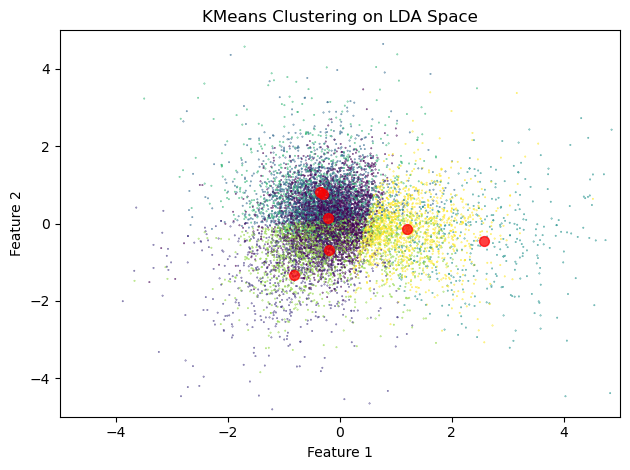

In [150]:
# Plotting the clusters from LDA
color_map = {0: 'red', 1: 'green', 2: 'blue', 3: 'orange', 4: 'yellow', 5: 'cyan', 6: 'magenta'}
plt.scatter(X_train_lda.iloc[:, 0], X_train_lda.iloc[:, 1], c=lda_clusters['Cluster_KMeans'], s=p_size, cmap='viridis')

# Plotting the centroids of the clusters
centers = kmeans_lda.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50, alpha=0.75)

plt.title('KMeans Clustering on LDA Space')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(-5, 5)  
plt.ylim(-5, 5)  
plt.tight_layout()
plt.savefig('../figures/KmeansLDA.png', dpi=500)
plt.show()

In [129]:
#get sil scores of LDA and PCA
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(X_train_lda, lda_clusters['Cluster_KMeans'])
print("LDA Silhouette Score:", silhouette_avg)

silhouette_avg = silhouette_score(X_train_pca, pca_clusters['Cluster_KMeans'])
print("PCA Silhouette Score:", silhouette_avg)



LDA Silhouette Score: 0.2055513586784367
PCA Silhouette Score: 0.18003658429030936


In [307]:
lda.lda.lda_components_

AttributeError: 'GridSearchCV' object has no attribute 'lda'

In [319]:
top_feature_contributions

array([[[-4.08330893,  4.38545403],
        [ 1.83014322,  2.84891143]],

       [[-4.08330893,  4.38545403],
        [ 1.83014322,  2.84891143]],

       [[-4.08330893,  4.38545403],
        [ 1.83014322,  2.84891143]],

       [[ 1.83014322,  2.84891143],
        [-4.08330893,  4.38545403]],

       [[ 1.83014322,  2.84891143],
        [-4.08330893,  4.38545403]],

       [[-4.08330893,  4.38545403],
        [ 1.83014322,  2.84891143]],

       [[-4.08330893,  4.38545403],
        [ 1.83014322,  2.84891143]],

       [[-4.08330893,  4.38545403],
        [ 1.83014322,  2.84891143]],

       [[-4.08330893,  4.38545403],
        [ 1.83014322,  2.84891143]],

       [[-4.08330893,  4.38545403],
        [ 1.83014322,  2.84891143]]])

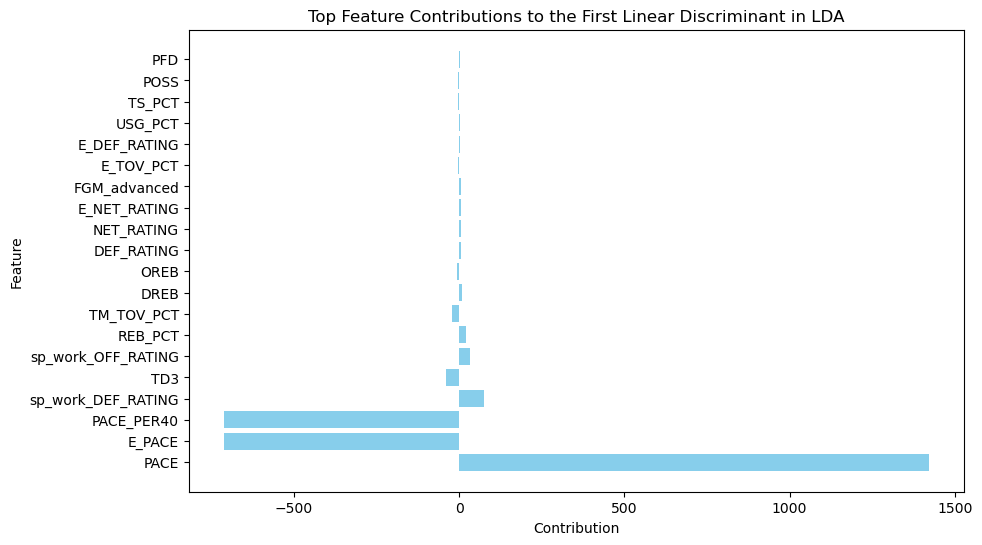

In [322]:
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X_train, y_train)

# Get the names of the features (assuming X_train is a DataFrame)
feature_names = X_train.columns

# Get the coefficients of the first linear discriminant
lda_components = lda.coef_
feature_names = np.array(X_train.columns)

# Sort features based on their contribution to the first linear discriminant
sorted_indices = np.argsort(np.abs(lda_components[0]))  # Considering only the first linear discriminant
top_feature_indices = sorted_indices[-20:]  # Change 10 to the desired number of top features
top_feature_names = feature_names[top_feature_indices]
top_feature_contributions = lda_components[0][top_feature_indices]  # Considering only the first linear discriminant

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_feature_names)), top_feature_contributions, color='skyblue')
plt.yticks(range(len(top_feature_names)), top_feature_names)
plt.xlabel('Contribution')
plt.ylabel('Feature')
plt.title('Top Feature Contributions to the First Linear Discriminant in LDA')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest contribution at the top
plt.savefig('LDAFeature.png', dpi=300)
plt.show()

In [121]:
### DBScan Clustering
from sklearn.cluster import DBSCAN

In [124]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
DB_labels = dbscan.fit_predict(X_train_lda)

clusters['Cluster_DBSCAN'] = DB_labels

silhouette_avg = silhouette_score(X_train_pca, y_train)
print("DB PCA Silhouette Score:", silhouette_avg)

In [125]:
import numpy as np

unique_clusters = np.unique(DB_labels)
n_noise = list(DB_labels).count(-1)

print(f"Number of clusters: {len(unique_clusters) - (1 if -1 in unique_clusters else 0)}")
print(f"Number of noise points: {n_noise}")

Number of clusters: 10
Number of noise points: 228


In [67]:
### Hierarchical Clustering

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [68]:
clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward')
model = clustering.fit(X_train)

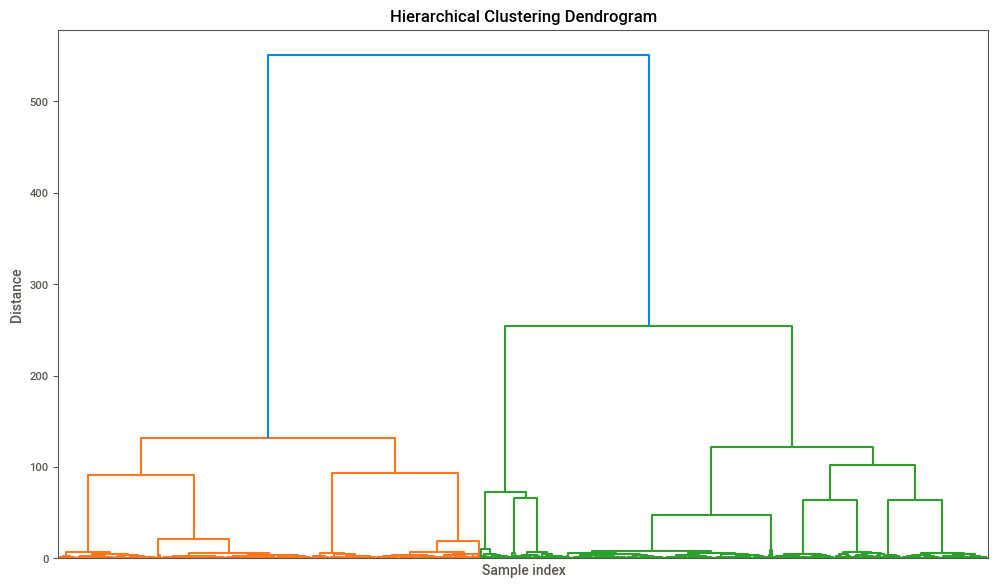

In [69]:
Z = linkage(scaled_features, 'ward')

#plot the dendrogram
plt.figure(figsize=(12, 7))
dendrogram(Z, no_labels=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()


In [70]:
n_clusters = 10
clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
cluster_labels = clustering.fit_predict(scaled_features)

clusters['Cluster_Hierarchical'] = cluster_labels

In [71]:
clusters.head(20)

,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,...,EFG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,sp_work_PACE,FGA_PG,Cluster_KMeans,Cluster_DBSCAN,Cluster_Hierarchical
0,0.392202,0.147541,0.143885,0.444,0.000000,0.007576,0.000,0.095238,0.106870,0.712,...,0.328000,0.347907,0.072507,0.072520,0.072507,0.734698,0.444,3,0,3
1,0.433486,0.196721,0.208633,0.406,0.150943,0.159091,0.391,0.047619,0.038168,0.833,...,0.330000,0.349538,0.071908,0.071922,0.071908,0.730749,0.406,1,1,5
2,0.720183,0.360656,0.338129,0.473,0.132075,0.166667,0.312,0.190476,0.198473,0.768,...,0.366000,0.361653,0.081820,0.081820,0.081820,0.739365,0.473,5,2,6
3,0.651376,0.295082,0.284173,0.457,0.000000,0.000000,0.000,0.285714,0.290076,0.787,...,0.355333,0.362973,0.082252,0.082259,0.082252,0.735057,0.457,2,3,7
4,0.286697,0.081967,0.086331,0.403,0.000000,0.000000,0.333,0.057143,0.068702,0.619,...,0.300000,0.369147,0.088539,0.088525,0.088539,0.728056,0.403,9,4,1
5,0.575688,0.221311,0.233813,0.416,0.000000,0.000000,0.000,0.047619,0.091603,0.441,...,0.281333,0.373612,0.091432,0.091439,0.091432,0.731467,0.416,2,3,7
6,0.192661,0.065574,0.079137,0.340,0.037736,0.045455,0.346,0.038095,0.038168,0.750,...,0.288000,0.364914,0.096654,0.096667,0.096654,0.731826,0.340,9,4,1
7,0.555046,0.254098,0.251799,0.444,0.000000,0.007576,0.143,0.123810,0.152672,0.656,...,0.319333,0.357731,0.078461,0.078467,0.078461,0.730390,0.444,7,5,2
8,0.566514,0.336066,0.330935,0.444,0.000000,0.000000,0.000,0.228571,0.282443,0.638,...,0.324667,0.368098,0.087208,0.087208,0.087208,0.732544,0.444,2,3,7
9,0.837156,0.565574,0.557554,0.449,0.226415,0.242424,0.381,0.342857,0.297710,0.909,...,0.362000,0.346898,0.066653,0.066693,0.066653,0.739006,0.449,10,6,0


In [72]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#calculate metrics for all three models
silhouette_kmeans = silhouette_score(scaled_features, clusters['Cluster_KMeans'])
calinski_harabasz_kmeans = calinski_harabasz_score(scaled_features, clusters['Cluster_KMeans'])
davies_bouldin_kmeans = davies_bouldin_score(scaled_features, clusters['Cluster_KMeans'])

silhouette_dbscan = silhouette_score(scaled_features, clusters['Cluster_DBSCAN'])
calinski_harabasz_dbscan = calinski_harabasz_score(scaled_features, clusters['Cluster_DBSCAN'])
davies_bouldin_dbscan = davies_bouldin_score(scaled_features, clusters['Cluster_DBSCAN'])

silhouette_hierarchical = silhouette_score(scaled_features, clusters['Cluster_Hierarchical'])
calinski_harabasz_hierarchical = calinski_harabasz_score(scaled_features, clusters['Cluster_Hierarchical'])
davies_bouldin_hierarchical = davies_bouldin_score(scaled_features, clusters['Cluster_Hierarchical'])

#put metrics into digestible table
metrics_df = pd.DataFrame({
    'Metric': ['Silhouette Score', 'Calinski-Harabasz Index', 'Davies-Bouldin Index'],
    'K-Means': [silhouette_kmeans, calinski_harabasz_kmeans, davies_bouldin_kmeans],
    'DBSCAN': [silhouette_dbscan, calinski_harabasz_dbscan, davies_bouldin_dbscan],
    'Hierarchical': [silhouette_hierarchical, calinski_harabasz_hierarchical, davies_bouldin_hierarchical]})

metrics_df = metrics_df.set_index('Metric').T
metrics_df


Metric,Silhouette Score,Calinski-Harabasz Index,Davies-Bouldin Index
K-Means,0.808442,26887.498530,0.861021
DBSCAN,0.821957,55927.122162,0.797005
Hierarchical,0.771651,50169.704489,0.360620


In general, for each of the metrics:
    -Silhouette Scores range from -1 to 1, with higher scores indicating that objects are well matched to their own clusters and not neighboring clusters
    -Calinski-Harabasz Index ratios that are higher indicate better defined clusters, as it is the ratio of the sum of between-cluster dispersion and within-cluster dispersion
    -Davies-Bouldin Index measure that is lower, as it is the average similarity of each cluster with its most similar cluster

All three models perform fairly well, but DBSCAN performs exceptionally well across all metrics, particularly in the Silhouette Score and Calinski-Harabasz Index. This indicates good cluster cohesion and separation, as well as cluster definition. Hierarchical Clustering metrics show mixed results, but in general, has well defined separations. K-Means clustering shows cohesive clusters, but they might not be as well defined as the other models or as distinctly serarated. Therefore, if we were to choose a model based on the results of this testing, DBMEANS would be appropriate.

In [40]:

#FUNCTION, NORM CHECK AND TRANSFORM
import pandas as pd
import numpy as np
#BAD FOR DATA N>5000 from scipy.stats import shapiro
from scipy.stats import boxcox
from scipy.stats import kstest

# Assuming df is your DataFrame

def check_normality_and_transform(column):
    # Check normality using Kolmogorov-Smirnov test
    stat, p = kstest(column, 'norm')

    # Set significance level
    alpha = 0.05

    # If p-value is less than alpha, reject null hypothesis (non-normality)
    if p < alpha:
        print(f"Column is not normally distributed (p-value={p:.4f}). Applying Box-Cox transformation.")

        # Apply Box-Cox transformation
        transformed_column, _ = boxcox(column + 1)  # Adding 1 to handle zero or negative values
        return transformed_column
    else:
        print(f"Column is normally distributed (p-value={p:.4f}). No transformation needed.")
        return column


